<a href="https://colab.research.google.com/github/MaxSMCON/Group_2/blob/main/Group_2_Stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group 2 Project

## Global food in 

in this project we are going to investigate 

In [184]:
# https://drive.google.com/file/d/1SbW8ns8H5HDE0FVH5pvZ5GkGUdPV_RgY/view?usp=sharing




In [185]:
import pandas as pd
from pandas_profiling import ProfileReport

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
import seaborn as sns
%matplotlib inline
from IPython.display import display
import requests
import io
from io import StringIO
# Sklearn
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.metrics import f1_score, plot_confusion_matrix
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn import metrics

from scipy.special import logit
from scipy import stats
# StatsModel
import statsmodels.api as stats
from statsmodels.formula.api import ols
from statsmodels.discrete.discrete_model import Logit

import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.formula.api as sm
from statsmodels.graphics.regressionplots import plot_regress_exog, plot_fit, plot_leverage_resid2, influence_plot
from scipy.stats import boxcox 
from scipy.stats import yeojohnson
import seaborn as sns 

In [186]:
# 1MfuleO34g6ZP1saJ1Ej7J7p4SCWYkAmG1MfuleO34g6ZP1saJ1Ej7J7p4SCWYkAmG
#https://drive.google.com/file/d/1SbW8ns8H5HDE0FVH5pvZ5GkGUdPV_RgY/view?usp=sharing

# https://drive.google.com/file/d/1SbW8ns8H5HDE0FVH5pvZ5GkGUdPV_RgY/view?usp=sharing

# Introduction

### Some functions

In [187]:
def description(df):
  print('Datframe Shape: \n',df.shape)
  print('Null Values: \n',df.isnull().sum())
  print('Datframe Info: \n', df.info())
  print(df.head())
  return


# Loading the Global Food dataset from google drive [Fact Table]


In [188]:
!pip install googledrivedownloader #black magic
from google_drive_downloader import GoogleDriveDownloader as gdd
gdd.download_file_from_google_drive(file_id="1SbW8ns8H5HDE0FVH5pvZ5GkGUdPV_RgY",
                                    dest_path="./global_food_prices.csv",
                                    unzip=False)
data = pd.read_csv("global_food_prices.csv")
df = data.copy()
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
0,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,1,2014,50.0,NaN
1,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,2,2014,50.0,NaN
2,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,3,2014,50.0,NaN
3,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,4,2014,50.0,NaN
4,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,5,2014,50.0,NaN


In [189]:
df = df.rename(columns = {'adm0_name' : 'Country', 'mkt_name': 'city',} )
df = df.drop(columns= {'adm1_name'})
df.head()


,adm0_id,Country,adm1_id,mkt_id,city,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
0,1.0,Afghanistan,272,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,1,2014,50.0,NaN
1,1.0,Afghanistan,272,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,2,2014,50.0,NaN
2,1.0,Afghanistan,272,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,3,2014,50.0,NaN
3,1.0,Afghanistan,272,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,4,2014,50.0,NaN
4,1.0,Afghanistan,272,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,5,2014,50.0,NaN


In [190]:
df[df['um_name'] == '12 KG' ]

,adm0_id,Country,adm1_id,mkt_id,city,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
363064,45.0,Cameroon,816,2613,Yaoundé-Mfoundi,147,Plantains - Retail,0.0,XAF,15,Retail,90,12 KG,1,2015,2500.0000,NaN
363065,45.0,Cameroon,816,2613,Yaoundé-Mfoundi,147,Plantains - Retail,0.0,XAF,15,Retail,90,12 KG,2,2015,2500.0000,NaN
363066,45.0,Cameroon,816,2613,Yaoundé-Mfoundi,147,Plantains - Retail,0.0,XAF,15,Retail,90,12 KG,3,2015,2500.0000,NaN
363067,45.0,Cameroon,816,2613,Yaoundé-Mfoundi,147,Plantains - Retail,0.0,XAF,15,Retail,90,12 KG,4,2015,2700.0000,NaN
363068,45.0,Cameroon,816,2613,Yaoundé-Mfoundi,147,Plantains - Retail,0.0,XAF,15,Retail,90,12 KG,5,2015,2700.0000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876051,249.0,Turkey,3057,2055,Izmir,341,Fuel (gas) - Retail,0.0,TRY,15,Retail,90,12 KG,12,2020,102.3353,NaN
1876052,249.0,Turkey,3057,2055,Izmir,341,Fuel (gas) - Retail,0.0,TRY,15,Retail,90,12 KG,1,2021,7.3209,NaN
1876053,249.0,Turkey,3057,2055,Izmir,341,Fuel (gas) - Retail,0.0,TRY,15,Retail,90,12 KG,2,2021,7.3257,NaN
1876054,249.0,Turkey,3057,2055,Izmir,341,Fuel (gas) - Retail,0.0,TRY,15,Retail,90,12 KG,3,2021,7.2588,NaN


## Convert mp_price with UOM

In [191]:
url2 ='https://raw.githubusercontent.com/MaxSMCON/Group_2/main/Data%20Storage/UOM_conversion_file.csv'
df_UOM =pd.read_csv(url2, encoding = 'latin-1')

dftest = df.merge(df_UOM,how='left', on= ['cm_name','um_name'],)
df['mp_priceUS'] = np.where(dftest['Conversion_Multiplier'] > 0, dftest['mp_price']*dftest['Conversion_Multiplier'], dftest['mp_price'])
df[df['um_name'] == '12 KG' ]

#Note Do not have conversion for fuel, and commodity item such as toothbrush, tooth paste, and other liquid that is unmeasurable and etc
#UOM in file has not been change but those that have been change will be reflect in mp_price as seen here where 2500 dollar for 12 kg and 208 dollar for 1 KG

,adm0_id,Country,adm1_id,mkt_id,city,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource,mp_priceUS
363064,45.0,Cameroon,816,2613,Yaoundé-Mfoundi,147,Plantains - Retail,0.0,XAF,15,Retail,90,12 KG,1,2015,2500.0000,NaN,208.2500
363065,45.0,Cameroon,816,2613,Yaoundé-Mfoundi,147,Plantains - Retail,0.0,XAF,15,Retail,90,12 KG,2,2015,2500.0000,NaN,208.2500
363066,45.0,Cameroon,816,2613,Yaoundé-Mfoundi,147,Plantains - Retail,0.0,XAF,15,Retail,90,12 KG,3,2015,2500.0000,NaN,208.2500
363067,45.0,Cameroon,816,2613,Yaoundé-Mfoundi,147,Plantains - Retail,0.0,XAF,15,Retail,90,12 KG,4,2015,2700.0000,NaN,224.9100
363068,45.0,Cameroon,816,2613,Yaoundé-Mfoundi,147,Plantains - Retail,0.0,XAF,15,Retail,90,12 KG,5,2015,2700.0000,NaN,224.9100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876051,249.0,Turkey,3057,2055,Izmir,341,Fuel (gas) - Retail,0.0,TRY,15,Retail,90,12 KG,12,2020,102.3353,NaN,102.3353
1876052,249.0,Turkey,3057,2055,Izmir,341,Fuel (gas) - Retail,0.0,TRY,15,Retail,90,12 KG,1,2021,7.3209,NaN,7.3209
1876053,249.0,Turkey,3057,2055,Izmir,341,Fuel (gas) - Retail,0.0,TRY,15,Retail,90,12 KG,2,2021,7.3257,NaN,7.3257
1876054,249.0,Turkey,3057,2055,Izmir,341,Fuel (gas) - Retail,0.0,TRY,15,Retail,90,12 KG,3,2021,7.2588,NaN,7.2588


## Loading Exchange currency table for 2021
converting local currencies to USD

In [192]:
url = 'https://raw.githubusercontent.com/MaxSMCON/Group_2/main/Data%20Storage/Currence_2021_Exchange.csv'

df_US = pd.read_csv(url)
df_US = df_US.rename(columns ={'Reference area': 'Country'})
df_US['Country'].unique()
description(df_US)

Datframe Shape: 
 (143, 2)
Null Values: 
 Country          0
Exchange Rate    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country        143 non-null    object 
 1   Exchange Rate  143 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB
Datframe Info: 
 None
     Country  Exchange Rate
0    Albania     103.031336
1    Algeria     134.421000
2  Argentina      94.155778
3  Australia       1.323348
4    Austria       0.840060


In [193]:
df = df.merge(df_US,
                    how='left', 
                    on= ['Country'])
df[df['Country'] == 'Afghanistan']
# description(dftest32)

,adm0_id,Country,adm1_id,mkt_id,city,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource,mp_priceUS,Exchange Rate
0,1.0,Afghanistan,272,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,1,2014,50.0000,NaN,50.0000,96.02
1,1.0,Afghanistan,272,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,2,2014,50.0000,NaN,50.0000,96.02
2,1.0,Afghanistan,272,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,3,2014,50.0000,NaN,50.0000,96.02
3,1.0,Afghanistan,272,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,4,2014,50.0000,NaN,50.0000,96.02
4,1.0,Afghanistan,272,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,5,2014,50.0000,NaN,50.0000,96.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15422,1.0,Afghanistan,99879,3236,Panjsher,800,Wheat flour (low quality) - Retail,0.0,AFN,15,Retail,5,KG,3,2021,34.0000,NaN,34.0000,96.02
15423,1.0,Afghanistan,99879,3236,Panjsher,800,Wheat flour (low quality) - Retail,0.0,AFN,15,Retail,5,KG,4,2021,35.5000,NaN,35.5000,96.02
15424,1.0,Afghanistan,99879,3236,Panjsher,800,Wheat flour (low quality) - Retail,0.0,AFN,15,Retail,5,KG,5,2021,33.2000,NaN,33.2000,96.02
15425,1.0,Afghanistan,99879,3236,Panjsher,800,Wheat flour (low quality) - Retail,0.0,AFN,15,Retail,5,KG,6,2021,29.6667,NaN,29.6667,96.02


## Normilizing Prices = converting local currencioes to USD


In [194]:
df.columns

Index(['adm0_id', 'Country', 'adm1_id', 'mkt_id', 'city', 'cm_id', 'cm_name',
       'cur_id', 'cur_name', 'pt_id', 'pt_name', 'um_id', 'um_name',
       'mp_month', 'mp_year', 'mp_price', 'mp_commoditysource', 'mp_priceUS',
       'Exchange Rate'],
      dtype='object')

In [195]:
df= df.dropna(subset = ['Exchange Rate'], how = "all")

In [196]:
 df['usprice'] = df['mp_priceUS'] / df['Exchange Rate']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [197]:
df.head()

,adm0_id,Country,adm1_id,mkt_id,city,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource,mp_priceUS,Exchange Rate,usprice
0,1.0,Afghanistan,272,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,1,2014,50.0,NaN,50.0,96.02,0.520725
1,1.0,Afghanistan,272,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,2,2014,50.0,NaN,50.0,96.02,0.520725
2,1.0,Afghanistan,272,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,3,2014,50.0,NaN,50.0,96.02,0.520725
3,1.0,Afghanistan,272,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,4,2014,50.0,NaN,50.0,96.02,0.520725
4,1.0,Afghanistan,272,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,5,2014,50.0,NaN,50.0,96.02,0.520725


In [198]:
df_UOM.head()

,cm_name,um_name,Conversion_Multiplier,Base_Unit
0,Bananas - Retail,KG,1.0000,KG
1,Bananas - Retail,12 KG,0.0833,KG
2,Bananas - Retail,Pound,0.4536,KG
3,Bananas - Retail,Unit,7.0000,KG
4,Bananas - Wholesale,KG,1.0000,KG


### Spliting "um_name" by space

In [199]:
# df[['um_name1', 'um_name2']] = df['um_name'].str.rsplit(n=1, expand = True)

In [200]:
# Number of rows for each country

country_unique, country_freq = np.unique(df[['Country', ]], return_counts = True)
listrows = []
for i in range(country_unique.shape[0]):
    
    print(country_unique[i], ': ', country_freq[i])
    listrows.append( [country_unique[i], country_freq[i]])

Afghanistan :  15427
Algeria :  1793
Angola :  1272
Argentina :  990
Armenia :  20600
Azerbaijan :  125
Bangladesh :  7758
Belarus :  444
Benin :  39530
Bhutan :  346
Bolivia :  17424
Burundi :  60921
Cambodia :  21871
Cape Verde :  2135
Central African Republic :  12720
Chad :  18896
China :  1312
Colombia :  26540
Congo :  5257
Costa Rica :  297
Democratic Republic of the Congo :  47052
Djibouti :  6006
Dominican Republic :  2392
Egypt :  2304
Eritrea :  100
Ethiopia :  24627
Gabon :  504
Gambia :  56971
Georgia :  80
Ghana :  25414
Guatemala :  3907
Guinea :  11810
Guinea-Bissau :  19796
Haiti :  13376
Honduras :  1629
Indonesia :  72437
Iraq :  25578
Japan :  1372
Kazakhstan :  3365
Kenya :  8884
Kyrgyzstan :  61188
Lao People's Democratic Republic :  29902
Lebanon :  42784
Lesotho :  9364
Liberia :  12302
Libya :  41207
Madagascar :  9193
Malawi :  22682
Mexico :  3927
Mongolia :  3692
Mozambique :  42278
Myanmar :  26694
Namibia :  7163
Nepal :  18071
Nicaragua :  8610
Niger :  5

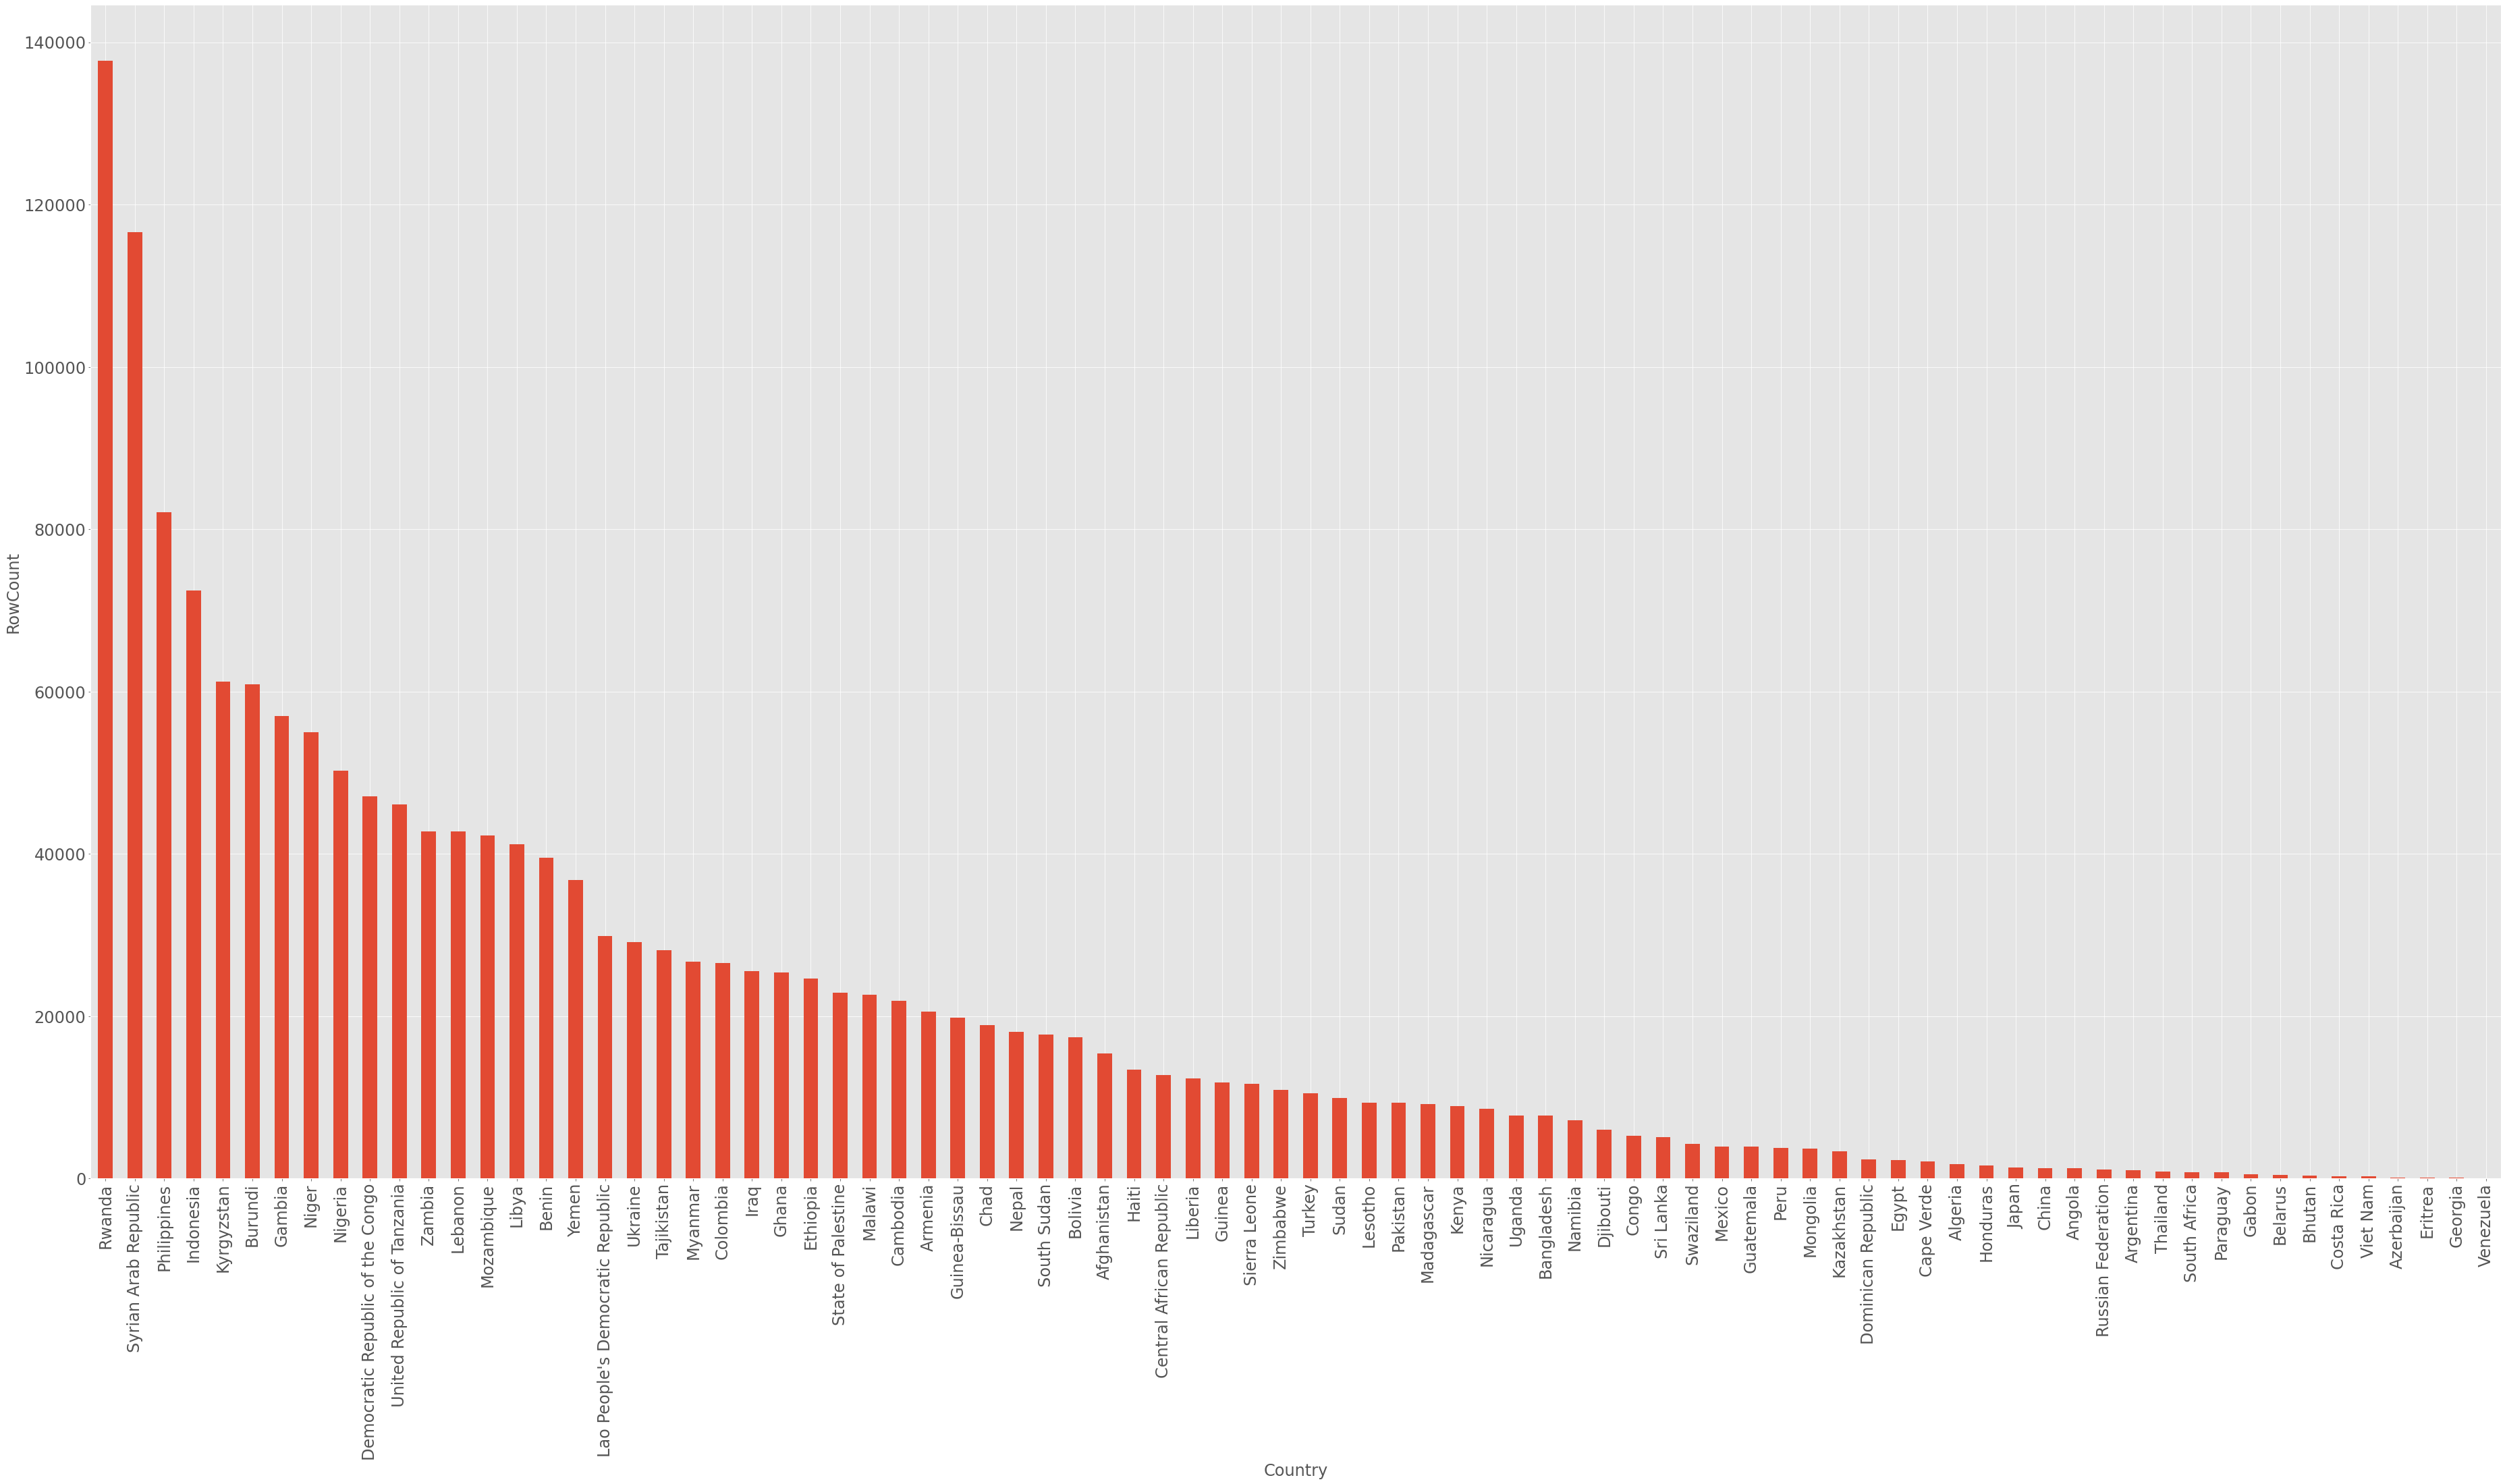

In [201]:
df1 = pd.DataFrame(listrows, columns = ['Country', 'RowCount'])
df1= df1.sort_values(by=['RowCount'],ascending=False)
ax= df1.plot(kind='bar', y = 'RowCount',x ='Country',    
    legend = False,figsize=(64,32), fontsize=24)
ax.set_xlabel("Country",fontsize=24)
ax.set_ylabel("RowCount",fontsize=24)
plt.show()

## Working with GDP data from GitHub 

In [202]:
url = 'https://raw.githubusercontent.com/MaxSMCON/Group_2/main/Data%20Storage/GDP.csv'
df_gdp = pd.read_csv(url, 
                    #  index_col=0, 
                     encoding= 'latin-1' )
df_gdp = pd.melt(df_gdp, id_vars=["Country",
                           "Subject Descriptor",
                            "Units","Scale",
                            "Country/Series-specific Notes"
                            ],
                   var_name ="Year",value_name="Value"
              )
# cleaning Value column
df_gdp['Value'] = df_gdp["Value"].str.replace(',','')
df_gdp['Value'] = df_gdp["Value"].str.replace('--','')

# converting Value column to numeric
df_gdp['Value'] = pd.to_numeric(df_gdp["Value"])

# Dropping attributes
df_gdp = df_gdp.drop(['Subject Descriptor',
                      'Country/Series-specific Notes' ,
                      'Scale',
                      
                      ], axis = 1)
# ///////////////////////////////////
# replacing null values with mean

# df_gdp = df_gdp['Value'].fillna(df_gdp.groupby([
#         'Country',
#         'Year'
# ])['Value'].transform('mean'), inplace = True)
# df_gdp = df_gdp[df_gdp['Value']!='NaN']

# removing zeroes

df_gdp.dropna(inplace= True)
df_gdp['Year'] = pd.to_numeric(df_gdp["Year"])
df_gdp=df_gdp[df_gdp.Year != 'Estimates Start After']# Droping non year values from the file 

# print(df_gdp.shape)
# print('null values\n',df_gdp.isnull().sum())
# print(df_gdp.info())
# df_gdp.head()


## Converting GDP to US dollar 
by using GDP and currency exchange tables

In [203]:
df_gdp.columns

Index(['Country', 'Units', 'Year', 'Value'], dtype='object')

In [204]:
df_US.columns

Index(['Country', 'Exchange Rate'], dtype='object')

In [205]:
df_test1 = pd.merge(
      df_gdp,
      df_US,
          left_on=('Country',),
          right_on=('Country', ),
                    how='left', 
            
                    )
df_test1 = df_test1.dropna(subset = ['Exchange Rate'], how = "all")


In [206]:
df_gdp = df_test1
df_gdp.head()

,Country,Units,Year,Value,Exchange Rate
0,Albania,National currency,1991,252.921,103.031336
1,Algeria,National currency,1991,3393.450,134.421000
2,Angola,National currency,1991,283.298,565.000000
4,Argentina,National currency,1991,350.738,94.155778
6,Australia,National currency,1991,818.854,1.323348


In [207]:
#  converting to USD
df_gdp['GDP_in_USD'] = df_gdp['Value'] / df_gdp['Exchange Rate']
df_gdp.head()

,Country,Units,Year,Value,Exchange Rate,GDP_in_USD
0,Albania,National currency,1991,252.921,103.031336,2.454797
1,Algeria,National currency,1991,3393.450,134.421000,25.244939
2,Angola,National currency,1991,283.298,565.000000,0.501412
4,Argentina,National currency,1991,350.738,94.155778,3.725082
6,Australia,National currency,1991,818.854,1.323348,618.774481


In [208]:
description(df_gdp)

Datframe Shape: 
 (3743, 6)
Null Values: 
 Country          0
Units            0
Year             0
Value            0
Exchange Rate    0
GDP_in_USD       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3743 entries, 0 to 5810
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country        3743 non-null   object 
 1   Units          3743 non-null   object 
 2   Year           3743 non-null   int64  
 3   Value          3743 non-null   float64
 4   Exchange Rate  3743 non-null   float64
 5   GDP_in_USD     3743 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 204.7+ KB
Datframe Info: 
 None
     Country              Units  Year     Value  Exchange Rate  GDP_in_USD
0    Albania  National currency  1991   252.921     103.031336    2.454797
1    Algeria  National currency  1991  3393.450     134.421000   25.244939
2     Angola  National currency  1991   283.298     565.00000

In [209]:
df_gdp.Year.unique () # all values are Year 

array([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

## Loading cost of living dataset from GitHUb

In [210]:
url1 = 'https://raw.githubusercontent.com/MaxSMCON/Group_2/main/Data%20Storage/cost%20of%20living%202020.csv'
df_cost = pd.read_csv(url1,index_col=0)
df_cost = df_cost.drop(['Unnamed: 9',
                      
                      ], axis = 1)
description(df_cost)

Datframe Shape: 
 (135, 8)
Null Values: 
 Country                           0
Cost of Living Index              0
Rent Index                        0
Cost of Living Plus Rent Index    0
Groceries Index                   0
Restaurant Price Index            0
Local Purchasing Power Index      0
McMeal($)                         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 135 entries, 1 to 135
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         135 non-null    object 
 1   Cost of Living Index            135 non-null    float64
 2   Rent Index                      135 non-null    float64
 3   Cost of Living Plus Rent Index  135 non-null    float64
 4   Groceries Index                 135 non-null    float64
 5   Restaurant Price Index          135 non-null    float64
 6   Local Purchasing Power Index    135 non-null    float64
 7  

## LOADING Countries list by region [Dimension Table]

In [211]:
url = 'https://raw.githubusercontent.com/MaxSMCON/Group_2/main/Data%20Storage/UNSD%20%E2%80%94%20Methodology.csv '
df_countries = pd.read_csv(url, index_col=0)
df_region = df_countries[['Region Name','Intermediate Region Name','Country or Area'] ]
df_region = df_region.rename( columns = {'Region Name': 'Continent', 'Intermediate Region Name': 'Region', 'Country or Area': 'Country' })
df_region.head()


,Continent,Region,Country
Global Code,,,
1,Africa,Northern Africa,Algeria
1,Africa,Northern Africa,Egypt
1,Africa,Northern Africa,Libya
1,Africa,Northern Africa,Morocco
1,Africa,Northern Africa,Sudan


In [212]:
df_region['Region'].unique()

array(['Northern Africa', 'Eastern Africa', 'Middle Africa',
       'Southern Africa', 'Western Africa', 'Caribbean',
       'Central America', 'South America', 'Northern America', nan,
       'Central Asia', 'Eastern Asia', 'South-eastern Asia',
       'Southern Asia', 'Western Asia', 'Eastern Europe',
       'Northern Europe', 'Channel Islands', 'Southern Europe',
       'Western Europe', 'Australia and New Zealand', 'Melanesia',
       'Micronesia', 'Polynesia'], dtype=object)

In [213]:
# Removing duplicates from country list
df_region = df_region.drop_duplicates(subset = ['Country'])


In [214]:
df_region.dropna(inplace=True)

In [215]:
df_region.isnull().sum()

Continent    0
Region       0
Country      0
dtype: int64

## Child Mortality Upload 

In [216]:
url = 'https://raw.githubusercontent.com/MaxSMCON/Group_2/main/Data%20Storage/child-deaths-igme-data.csv'
df_childMort = pd.read_csv(url, index_col=0)
# Dropping empty values in Code columns. The zeroes belong to continents and regions.
df_childMort.dropna(inplace= True)

description(df_childMort)

Datframe Shape: 
 (10017, 3)
Null Values: 
 Code                           0
Year                           0
Number of under-five deaths    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 10017 entries, Afghanistan to Zimbabwe
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Code                         10017 non-null  object
 1   Year                         10017 non-null  int64 
 2   Number of under-five deaths  10017 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 313.0+ KB
Datframe Info: 
 None
            Code  Year  Number of under-five deaths
Entity                                             
Afghanistan  AFG  1967                       161588
Afghanistan  AFG  1968                       162629
Afghanistan  AFG  1969                       163529
Afghanistan  AFG  1970                       164463
Afghanistan  AFG  1971                       165306


## Birth rate vs Death rate Upload

In [217]:
url = 'https://raw.githubusercontent.com/MaxSMCON/Group_2/main/Data%20Storage/birth-rate-vs-death-rate.csv'
df_BirthDeathRate = pd.read_csv(url, index_col=0)
df_BirthDeathRate = df_BirthDeathRate.loc[df_BirthDeathRate['Code'] != 'NaN']
df_BirthDeathRate = df_BirthDeathRate.drop(['Continent'], axis =1 )
df_BirthDeathRate.dropna(inplace= True)


description(df_BirthDeathRate)

Datframe Shape: 
 (11997, 5)
Null Values: 
 Code                                    0
Year                                    0
Death rate, crude (per 1,000 people)    0
Birth rate, crude (per 1,000 people)    0
Population (historical estimates)       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 11997 entries, Afghanistan to Zimbabwe
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Code                                  11997 non-null  object 
 1   Year                                  11997 non-null  int64  
 2   Death rate, crude (per 1,000 people)  11997 non-null  float64
 3   Birth rate, crude (per 1,000 people)  11997 non-null  float64
 4   Population (historical estimates)     11997 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 562.4+ KB
Datframe Info: 
 None
            Code  ...  Population (historical estimates)
Entit

In [218]:
df_BirthDeathRate.head()

,Code,Year,"Death rate, crude (per 1,000 people)","Birth rate, crude (per 1,000 people)",Population (historical estimates)
Entity,,,,,
Afghanistan,AFG,1960,32.219,51.279,8996967.0
Afghanistan,AFG,1961,31.649,51.373,9169406.0
Afghanistan,AFG,1962,31.093,51.457,9351442.0
Afghanistan,AFG,1963,30.551,51.530,9543200.0
Afghanistan,AFG,1964,30.022,51.589,9744772.0


## Fertility rate 

In [219]:
url = 'https://raw.githubusercontent.com/MaxSMCON/Group_2/main/Data%20Storage/children-per-woman-UN.csv'
df_Fertility = pd.read_csv(url, index_col=0)
df_Fertility = df_Fertility.loc[df_Fertility['Code'] != 'NaN']
df_Fertility.dropna(inplace= True)

df_Fertility = df_Fertility.rename(columns = 
                                   {'Estimates, 1950 - 2020: Annually interpolated demographic indicators - Total fertility (live births per woman)' : 'Fertility'} )

description(df_Fertility)

Datframe Shape: 
 (14413, 3)
Null Values: 
 Code         0
Year         0
Fertility    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 14413 entries, Afghanistan to Zimbabwe
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Code       14413 non-null  object 
 1   Year       14413 non-null  int64  
 2   Fertility  14413 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 450.4+ KB
Datframe Info: 
 None
            Code  Year  Fertility
Entity                           
Afghanistan  AFG  1950       7.45
Afghanistan  AFG  1951       7.45
Afghanistan  AFG  1952       7.45
Afghanistan  AFG  1953       7.45
Afghanistan  AFG  1954       7.45


In [220]:
url = 'https://raw.githubusercontent.com/MaxSMCON/Group_2/main/Data%20Storage/raw_proces_other.csv'
df_class = pd.read_csv(url)
df_class

,COMMODITY,TYPE
0,Bread,PROCESSED
1,Wheat,RAW
2,Rice,RAW
3,Wage,OTHER
4,Livestock,RAW
...,...,...
144,Internet,OTHER
145,Electricity,OTHER
146,Curd,PROCESSED
147,Sour,PROCESSED


## Create Date Column

In [221]:
# Create a Date Column
df["Date"] = [  y+ " " +x for x,y in list(zip(df["mp_month"].astype(str).values, df["mp_year"].astype(str).values)) ]
df["Date"] = pd.to_datetime(df["Date"])

In [222]:
df = df.set_index("Date")

## Leaving comodity names with the first words

In [223]:
df['cm_name'] = df['cm_name'].str.split(" ", 1, expand = True)
df['cm_name'].head()

Date
2014-01-01    Bread
2014-02-01    Bread
2014-03-01    Bread
2014-04-01    Bread
2014-05-01    Bread
Name: cm_name, dtype: object

In [224]:
df.head()

,adm0_id,Country,adm1_id,mkt_id,city,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource,mp_priceUS,Exchange Rate,usprice
Date,,,,,,,,,,,,,,,,,,,,
2014-01-01,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,1,2014,50.0,NaN,50.0,96.02,0.520725
2014-02-01,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,2,2014,50.0,NaN,50.0,96.02,0.520725
2014-03-01,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,3,2014,50.0,NaN,50.0,96.02,0.520725
2014-04-01,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,4,2014,50.0,NaN,50.0,96.02,0.520725
2014-05-01,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,5,2014,50.0,NaN,50.0,96.02,0.520725


In [225]:
df['cm_name'].unique()

array(['Bread', 'Wheat', 'Rice', 'Wage', 'Livestock', 'Fuel', 'Exchange',
       'Oil', 'Sugar', 'Pulses', 'Salt', 'Beans', 'Milk', 'Potatoes',
       'Eggs', 'Meat', 'Lentils', 'Pasta', 'Tomatoes', 'Cheese',
       'Carrots', 'Onions', 'Bananas', 'Tea', 'Fish', 'Apples', 'Oranges',
       'Cassava', 'Maize', 'Peas', 'Cabbage', 'Cucumbers', 'Beetroots',
       'Buckwheat', 'Sorghum', 'Millet', 'Sweet', 'Yam', 'Plantains',
       'Soybeans', 'Lemons', 'Papaya', 'Okra', 'Groundnuts', 'Peppers',
       'Coconut', 'Leafy', 'Shrimps', 'Taro', 'Snail', 'Noodles',
       'Quinoa', 'Avocados', 'Eggplants', 'Snake', 'Water', 'Wax',
       'Prawn', 'Sesame', 'Squashes', 'Charcoal', 'Laundry', 'Chicken',
       'Peanut', 'Garlic', 'Cocoa', 'Coffee', 'Chickpeas', 'Cauliflower',
       'Spinach', 'Blackberry', 'Broccoli', 'Mangoes', 'Pumpkin', 'Guava',
       'Passion', 'Barley', 'Transport', 'Cowpeas', 'Ghee', 'Teff', 'Lin',
       'Niger', 'Rape', 'Butter', 'Lettuce', 'Kale', 'Swiss', 'Honey',
  

In [226]:
#Drop mp_commoditysource columns
df.drop('mp_commoditysource', inplace=True, axis=1)
df.isnull().sum()
# No more null values 


adm0_id          0
Country          0
adm1_id          0
mkt_id           0
city             0
cm_id            0
cm_name          0
cur_id           0
cur_name         0
pt_id            0
pt_name          0
um_id            0
um_name          0
mp_month         0
mp_year          0
mp_price         0
mp_priceUS       0
Exchange Rate    0
usprice          0
dtype: int64

# RAMILA REVISED THE PIVOT 

In [227]:
df.head()

,adm0_id,Country,adm1_id,mkt_id,city,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_priceUS,Exchange Rate,usprice
Date,,,,,,,,,,,,,,,,,,,
2014-01-01,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,1,2014,50.0,50.0,96.02,0.520725
2014-02-01,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,2,2014,50.0,50.0,96.02,0.520725
2014-03-01,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,3,2014,50.0,50.0,96.02,0.520725
2014-04-01,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,4,2014,50.0,50.0,96.02,0.520725
2014-05-01,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,5,2014,50.0,50.0,96.02,0.520725


In [228]:
# df_pivot = pd.pivot_table(df, index = [
#                                       #  'adm1_name', 
#                                        'cm_name', 
#                                       #  'mp_year',
#                                       #  'um_name'
#                                        ], 
#                           values = 'mp_price', aggfunc = ['mean', 
#                                                             'std',
#                                                           'count',
#                                                           ]) # getting an average price per year, per Unit of Measure
# df_pivot.head()


In [229]:
# dfkk = df_pivot.reindex(df_pivot['count'].sort_values(by = 'mp_price', ascending = False).index)
# dfkk.head(20)

### Based on our analysis rice is most common commodity and we are going to examine it.

# Merging Food with Countries

In [230]:
df.columns

Index(['adm0_id', 'Country', 'adm1_id', 'mkt_id', 'city', 'cm_id', 'cm_name',
       'cur_id', 'cur_name', 'pt_id', 'pt_name', 'um_id', 'um_name',
       'mp_month', 'mp_year', 'mp_price', 'mp_priceUS', 'Exchange Rate',
       'usprice'],
      dtype='object')

In [231]:
# Join food and countries by region
df5 = pd.merge(
    df,
    df_region,
    # left_on=('Country'),
    # right_on=('Country'),
    
    how='left',
    on = 'Country',
    validate = 'many_to_one'
)
df5.head()

,adm0_id,Country,adm1_id,mkt_id,city,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_priceUS,Exchange Rate,usprice,Continent,Region
0,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,1,2014,50.0,50.0,96.02,0.520725,Asia,Southern Asia
1,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,2,2014,50.0,50.0,96.02,0.520725,Asia,Southern Asia
2,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,3,2014,50.0,50.0,96.02,0.520725,Asia,Southern Asia
3,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,4,2014,50.0,50.0,96.02,0.520725,Asia,Southern Asia
4,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,5,2014,50.0,50.0,96.02,0.520725,Asia,Southern Asia



# Aggregating Food to years

In [232]:
df5['cm_name'].unique()

array(['Bread', 'Wheat', 'Rice', 'Wage', 'Livestock', 'Fuel', 'Exchange',
       'Oil', 'Sugar', 'Pulses', 'Salt', 'Beans', 'Milk', 'Potatoes',
       'Eggs', 'Meat', 'Lentils', 'Pasta', 'Tomatoes', 'Cheese',
       'Carrots', 'Onions', 'Bananas', 'Tea', 'Fish', 'Apples', 'Oranges',
       'Cassava', 'Maize', 'Peas', 'Cabbage', 'Cucumbers', 'Beetroots',
       'Buckwheat', 'Sorghum', 'Millet', 'Sweet', 'Yam', 'Plantains',
       'Soybeans', 'Lemons', 'Papaya', 'Okra', 'Groundnuts', 'Peppers',
       'Coconut', 'Leafy', 'Shrimps', 'Taro', 'Snail', 'Noodles',
       'Quinoa', 'Avocados', 'Eggplants', 'Snake', 'Water', 'Wax',
       'Prawn', 'Sesame', 'Squashes', 'Charcoal', 'Laundry', 'Chicken',
       'Peanut', 'Garlic', 'Cocoa', 'Coffee', 'Chickpeas', 'Cauliflower',
       'Spinach', 'Blackberry', 'Broccoli', 'Mangoes', 'Pumpkin', 'Guava',
       'Passion', 'Barley', 'Transport', 'Cowpeas', 'Ghee', 'Teff', 'Lin',
       'Niger', 'Rape', 'Butter', 'Lettuce', 'Kale', 'Swiss', 'Honey',
  

In [233]:
df_class

,COMMODITY,TYPE
0,Bread,PROCESSED
1,Wheat,RAW
2,Rice,RAW
3,Wage,OTHER
4,Livestock,RAW
...,...,...
144,Internet,OTHER
145,Electricity,OTHER
146,Curd,PROCESSED
147,Sour,PROCESSED


In [234]:
df5 = pd.merge(
    df5,
    df_class,
    left_on=('cm_name'),
    right_on=('COMMODITY'),
    
    how='left',
    # on = 'Country',
    validate = 'many_to_many'
)
df5.head()


,adm0_id,Country,adm1_id,mkt_id,city,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_priceUS,Exchange Rate,usprice,Continent,Region,COMMODITY,TYPE
0,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,1,2014,50.0,50.0,96.02,0.520725,Asia,Southern Asia,Bread,PROCESSED
1,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,2,2014,50.0,50.0,96.02,0.520725,Asia,Southern Asia,Bread,PROCESSED
2,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,3,2014,50.0,50.0,96.02,0.520725,Asia,Southern Asia,Bread,PROCESSED
3,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,4,2014,50.0,50.0,96.02,0.520725,Asia,Southern Asia,Bread,PROCESSED
4,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,5,2014,50.0,50.0,96.02,0.520725,Asia,Southern Asia,Bread,PROCESSED


In [235]:
df5.columns

Index(['adm0_id', 'Country', 'adm1_id', 'mkt_id', 'city', 'cm_id', 'cm_name',
       'cur_id', 'cur_name', 'pt_id', 'pt_name', 'um_id', 'um_name',
       'mp_month', 'mp_year', 'mp_price', 'mp_priceUS', 'Exchange Rate',
       'usprice', 'Continent', 'Region', 'COMMODITY', 'TYPE'],
      dtype='object')

In [236]:
description(df5)

Datframe Shape: 
 (1664502, 23)
Null Values: 
 adm0_id              0
Country              0
adm1_id              0
mkt_id               0
city                 0
cm_id                0
cm_name              0
cur_id               0
cur_name             0
pt_id                0
pt_name              0
um_id                0
um_name              0
mp_month             0
mp_year              0
mp_price             0
mp_priceUS           0
Exchange Rate        0
usprice              0
Continent        23812
Region           23812
COMMODITY            0
TYPE                 0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1664502 entries, 0 to 1664501
Data columns (total 23 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   adm0_id        1664502 non-null  float64
 1   Country        1664502 non-null  object 
 2   adm1_id        1664502 non-null  int64  
 3   mkt_id         1664502 non-null  int64  
 4   city           16

In [237]:
df5['TYPE'].unique()

array(['PROCESSED', 'RAW', 'OTHER'], dtype=object)

In [238]:
country_df = df5[['Country','mp_year','cm_name','usprice', ]]
# country_df = country_df.loc[df5['Region']=='Southern Asia']
# country_df = country_df.loc[df5['Region']=='Southern Asia']
# country_df = country_df.loc[df5['Region']=='Southern Asia']

country_df = country_df.loc[df5['cm_name'].isin([
                                                #  'Bread', 
                                                #  'Sugar',
                                                #  'Maize',
                                                #  'Wheat',
                                                #  "Onions",
                                                #   'Eggs',
                                                # 'Corn',  
                                                #  'Meat','Disinfecting',
                                                #  'Beans' ,
                                                 
                                                 'Rice'])]
# country_df = country_df.loc[df5['TYPE'].isin(['RAW',])]

country_df = country_df.groupby(by=['Country','mp_year','cm_name']).mean().reset_index(level=['Country', 'mp_year','cm_name'])
# country_df = country_df.groupby(by=['Country','mp_year','TYPE']).mean().reset_index(level=['Country', 'mp_year','TYPE'])
country_df = country_df.pivot(index=["Country", "mp_year"], columns=["cm_name"],values="usprice").reset_index(level=['Country', 'mp_year'])
country_df.reset_index(inplace=True,drop=False)
description(country_df)

Datframe Shape: 
 (1046, 4)
Null Values: 
 cm_name
index      0
Country    0
mp_year    0
Rice       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1046 entries, 0 to 1045
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    1046 non-null   int64  
 1   Country  1046 non-null   object 
 2   mp_year  1046 non-null   int64  
 3   Rice     1046 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 32.8+ KB
Datframe Info: 
 None
cm_name  index      Country  mp_year      Rice
0            0  Afghanistan     2007  0.283790
1            1  Afghanistan     2008  0.420083
2            2  Afghanistan     2009  0.361595
3            3  Afghanistan     2010  0.330410
4            4  Afghanistan     2011  0.342172


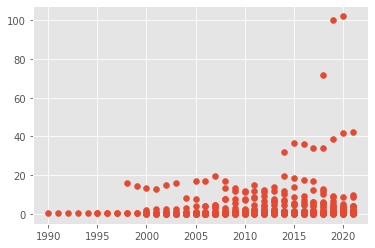

In [239]:
fig, ax = plt.subplots()
ax.scatter( country_df["mp_year"], country_df['Rice'], 
          #  hue = country_df['Country']
           )

In [240]:
country_df['Country'].unique()

array(['Afghanistan', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Bangladesh', 'Benin', 'Bhutan', 'Bolivia', 'Burundi', 'Cambodia',
       'Cape Verde', 'Central African Republic', 'Chad', 'China',
       'Colombia', 'Congo', 'Costa Rica',
       'Democratic Republic of the Congo', 'Djibouti',
       'Dominican Republic', 'Egypt', 'Ethiopia', 'Gabon', 'Gambia',
       'Ghana', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Honduras', 'Indonesia', 'Iraq', 'Japan', 'Kenya', 'Kyrgyzstan',
       "Lao People's Democratic Republic", 'Lebanon', 'Lesotho',
       'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mexico', 'Mongolia',
       'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Nicaragua', 'Niger',
       'Nigeria', 'Pakistan', 'Paraguay', 'Peru', 'Philippines', 'Rwanda',
       'Sierra Leone', 'South Sudan', 'Sri Lanka', 'State of Palestine',
       'Swaziland', 'Syrian Arab Republic', 'Tajikistan', 'Thailand',
       'Turkey', 'Uganda', 'Ukraine', 'United Republic of Ta

In [241]:
print(df_childMort.columns)
df_region.columns

Index(['Code', 'Year', 'Number of under-five deaths'], dtype='object')


Index(['Continent', 'Region', 'Country'], dtype='object')

### Join food wiith population

In [242]:

df_all = pd.merge(
    country_df,
    df_childMort,
    left_on=('Country', 'mp_year'),
    right_on=('Entity', "Year"),
        
    how='left',
    # on = 'Country',
    validate = 'one_to_one'
)
df_all = df_all.drop(['Year'], axis = 1)
df_all.head()

,index,Country,mp_year,Rice,Code,Number of under-five deaths
0,0,Afghanistan,2007,0.283790,AFG,112316.0
1,1,Afghanistan,2008,0.420083,AFG,108874.0
2,2,Afghanistan,2009,0.361595,AFG,105248.0
3,3,Afghanistan,2010,0.330410,AFG,101508.0
4,4,Afghanistan,2011,0.342172,AFG,97652.0


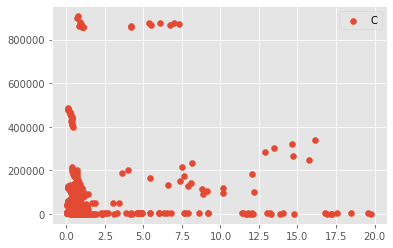

In [243]:
fig, ax = plt.subplots()
ax.scatter( df_all["Rice"], df_all['Number of under-five deaths'], 
          #  hue = country_df['Country']
           )
plt.legend('Country')
plt.show()

In [244]:
df_BirthDeathRate.columns

Index(['Code', 'Year', 'Death rate, crude (per 1,000 people)',
       'Birth rate, crude (per 1,000 people)',
       'Population (historical estimates)'],
      dtype='object')

# Joined tables: Food, ChildMort, df_BirthDeathRate, Fertility

In [245]:
# join 
df_all = pd.merge(
    df_all,
    df_BirthDeathRate,
    left_on=('Code', 'mp_year'),
    right_on=('Code', "Year"),
        
    how='left',
    # on = 'Country',
    # validate = 'one_to_one'
)
df_all = df_all.drop(['Year'], axis = 1)
df_all.head()


,index,Country,mp_year,Rice,Code,Number of under-five deaths,"Death rate, crude (per 1,000 people)","Birth rate, crude (per 1,000 people)",Population (historical estimates)
0,0,Afghanistan,2007,0.283790,AFG,112316.0,9.287,42.944,27100542.0
1,1,Afghanistan,2008,0.420083,AFG,108874.0,8.932,41.949,27722281.0
2,2,Afghanistan,2009,0.361595,AFG,105248.0,8.584,40.903,28394806.0
3,3,Afghanistan,2010,0.330410,AFG,101508.0,8.250,39.829,29185511.0
4,4,Afghanistan,2011,0.342172,AFG,97652.0,7.936,38.750,30117411.0


# New Section

In [246]:
# join 
df_all = pd.merge(
    df_all,
    df_Fertility,
    left_on=('Code', 'mp_year'),
    right_on=('Code', "Year"),
        
    how='left',
    # on = 'Country',
    # validate = 'one_to_one'
)
df_all = df_all.drop(['Year'], axis = 1)
df_all.head()

,index,Country,mp_year,Rice,Code,Number of under-five deaths,"Death rate, crude (per 1,000 people)","Birth rate, crude (per 1,000 people)",Population (historical estimates),Fertility
0,0,Afghanistan,2007,0.283790,AFG,112316.0,9.287,42.944,27100542.0,6.555
1,1,Afghanistan,2008,0.420083,AFG,108874.0,8.932,41.949,27722281.0,6.373
2,2,Afghanistan,2009,0.361595,AFG,105248.0,8.584,40.903,28394806.0,6.180
3,3,Afghanistan,2010,0.330410,AFG,101508.0,8.250,39.829,29185511.0,5.977
4,4,Afghanistan,2011,0.342172,AFG,97652.0,7.936,38.750,30117411.0,5.770


# Join GDP table

In [247]:
df_all.columns

Index(['index', 'Country', 'mp_year', 'Rice', 'Code',
       'Number of under-five deaths', 'Death rate, crude (per 1,000 people)',
       'Birth rate, crude (per 1,000 people)',
       'Population (historical estimates)', 'Fertility'],
      dtype='object')

In [248]:
df_test= pd.merge(
    df_all,
    df_gdp,
    left_on=('Country','mp_year' ),
    right_on=('Country', 'Year'),
    
    how='left',
    # on = 'Country',
    # validate = 'many_to_one'
)
df_all = df_test.drop(['Units', 'Year'] , axis = 1)
df_all = df_all.rename(columns = { 'Number of under-five deaths': 'child_mort',
                                      'Death rate, crude (per 1,000 people)': 'death_rate',
                                      'Birth rate, crude (per 1,000 people)': 'birth_rate',
                                       'Population (historical estimates)': 'population'})
df_all.head()

,index,Country,mp_year,Rice,Code,child_mort,death_rate,birth_rate,population,Fertility,Value,Exchange Rate,GDP_in_USD
0,0,Afghanistan,2007,0.283790,AFG,112316.0,9.287,42.944,27100542.0,6.555,662.650,96.02,6.901166
1,1,Afghanistan,2008,0.420083,AFG,108874.0,8.932,41.949,27722281.0,6.373,688.247,96.02,7.167746
2,2,Afghanistan,2009,0.361595,AFG,105248.0,8.584,40.903,28394806.0,6.180,829.924,96.02,8.643241
3,3,Afghanistan,2010,0.330410,AFG,101508.0,8.250,39.829,29185511.0,5.977,899.956,96.02,9.372589
4,4,Afghanistan,2011,0.342172,AFG,97652.0,7.936,38.750,30117411.0,5.770,958.266,96.02,9.979858


In [249]:
description(df_all)

Datframe Shape: 
 (1046, 13)
Null Values: 
 index              0
Country            0
mp_year            0
Rice               0
Code             209
child_mort       209
death_rate       209
birth_rate       209
population       209
Fertility        209
Value            144
Exchange Rate    144
GDP_in_USD       144
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 0 to 1045
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1046 non-null   int64  
 1   Country        1046 non-null   object 
 2   mp_year        1046 non-null   int64  
 3   Rice           1046 non-null   float64
 4   Code           837 non-null    object 
 5   child_mort     837 non-null    float64
 6   death_rate     837 non-null    float64
 7   birth_rate     837 non-null    float64
 8   population     837 non-null    float64
 9   Fertility      837 non-null    float64
 10  Value          902 non-null   

## Currency Conversion Table

In [250]:
df_currency = df.loc[df['cm_name'] == 'Exchange']
df_currency.nunique()

adm0_id            15
Country            15
adm1_id           130
mkt_id            303
city              297
cm_id               2
cm_name             1
cur_id              1
cur_name           15
pt_id               1
pt_name             1
um_id               1
um_name             1
mp_month           12
mp_year            11
mp_price         2898
mp_priceUS       2898
Exchange Rate      14
usprice          3129
dtype: int64

## Connecting df_all to Continent

In [251]:
# Join food and countries by region
df_all = pd.merge(
    df_all,
    df_region,
    # left_on=('Country'),
    # right_on=('Country'),
    
    how='left',
    on = 'Country',
    validate = 'many_to_one'
)
df_all.head()

,index,Country,mp_year,Rice,Code,child_mort,death_rate,birth_rate,population,Fertility,Value,Exchange Rate,GDP_in_USD,Continent,Region
0,0,Afghanistan,2007,0.283790,AFG,112316.0,9.287,42.944,27100542.0,6.555,662.650,96.02,6.901166,Asia,Southern Asia
1,1,Afghanistan,2008,0.420083,AFG,108874.0,8.932,41.949,27722281.0,6.373,688.247,96.02,7.167746,Asia,Southern Asia
2,2,Afghanistan,2009,0.361595,AFG,105248.0,8.584,40.903,28394806.0,6.180,829.924,96.02,8.643241,Asia,Southern Asia
3,3,Afghanistan,2010,0.330410,AFG,101508.0,8.250,39.829,29185511.0,5.977,899.956,96.02,9.372589,Asia,Southern Asia
4,4,Afghanistan,2011,0.342172,AFG,97652.0,7.936,38.750,30117411.0,5.770,958.266,96.02,9.979858,Asia,Southern Asia


In [252]:
df_all.head()

,index,Country,mp_year,Rice,Code,child_mort,death_rate,birth_rate,population,Fertility,Value,Exchange Rate,GDP_in_USD,Continent,Region
0,0,Afghanistan,2007,0.283790,AFG,112316.0,9.287,42.944,27100542.0,6.555,662.650,96.02,6.901166,Asia,Southern Asia
1,1,Afghanistan,2008,0.420083,AFG,108874.0,8.932,41.949,27722281.0,6.373,688.247,96.02,7.167746,Asia,Southern Asia
2,2,Afghanistan,2009,0.361595,AFG,105248.0,8.584,40.903,28394806.0,6.180,829.924,96.02,8.643241,Asia,Southern Asia
3,3,Afghanistan,2010,0.330410,AFG,101508.0,8.250,39.829,29185511.0,5.977,899.956,96.02,9.372589,Asia,Southern Asia
4,4,Afghanistan,2011,0.342172,AFG,97652.0,7.936,38.750,30117411.0,5.770,958.266,96.02,9.979858,Asia,Southern Asia


## Statistcal Inference Analysis of the dataframe

In [253]:
### Heat Map for whole dataframe

In [254]:
df_every = df_all

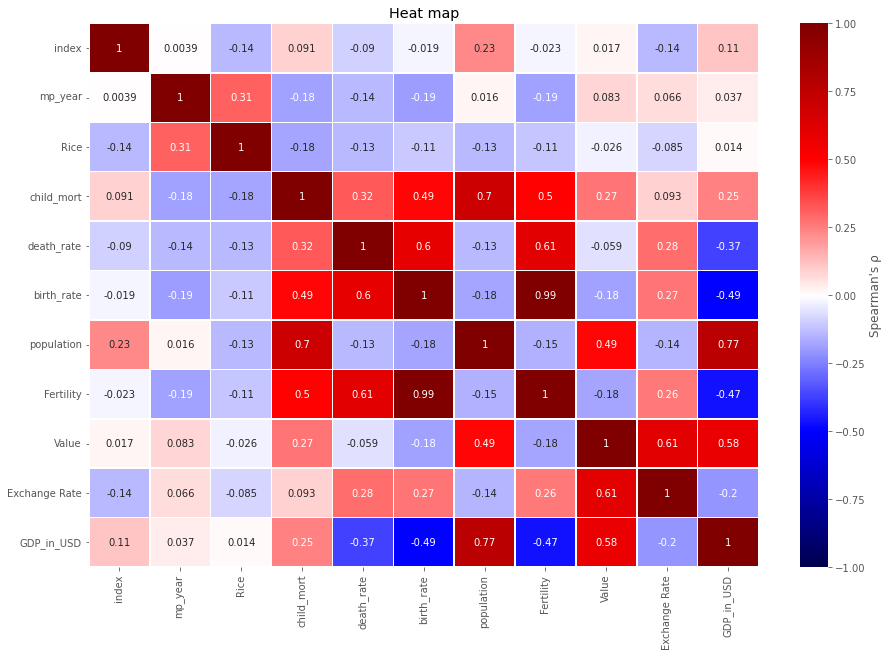

In [255]:
df_cm = df_every.corr(method = 'spearman')

plt.figure(figsize=(15,10))
ax = sns.heatmap(df_cm, cmap="seismic", annot=True, linewidths=.5, cbar_kws={"label": "Spearman's ρ"}, vmin=-1, vmax=1);
ax.set_title("Heat map");

<li> Heat map shows strong positive correlatioon between GDP and population, 

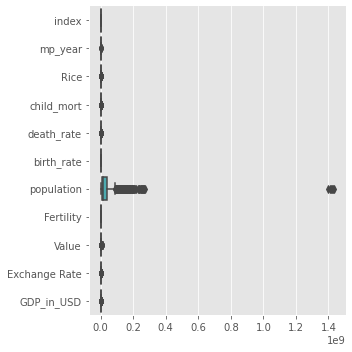

In [256]:
sns.catplot(data=df_every, orient="h", kind="box");

In [257]:
# df_every_Afghanistan = df_every[df_every('Country' == 'Afghanistan')
df_every_Afghanistan = df_every[df_every.Country == "Afghanistan"]
df_every_Afghanistan.head()

,index,Country,mp_year,Rice,Code,child_mort,death_rate,birth_rate,population,Fertility,Value,Exchange Rate,GDP_in_USD,Continent,Region
0,0,Afghanistan,2007,0.283790,AFG,112316.0,9.287,42.944,27100542.0,6.555,662.650,96.02,6.901166,Asia,Southern Asia
1,1,Afghanistan,2008,0.420083,AFG,108874.0,8.932,41.949,27722281.0,6.373,688.247,96.02,7.167746,Asia,Southern Asia
2,2,Afghanistan,2009,0.361595,AFG,105248.0,8.584,40.903,28394806.0,6.180,829.924,96.02,8.643241,Asia,Southern Asia
3,3,Afghanistan,2010,0.330410,AFG,101508.0,8.250,39.829,29185511.0,5.977,899.956,96.02,9.372589,Asia,Southern Asia
4,4,Afghanistan,2011,0.342172,AFG,97652.0,7.936,38.750,30117411.0,5.770,958.266,96.02,9.979858,Asia,Southern Asia


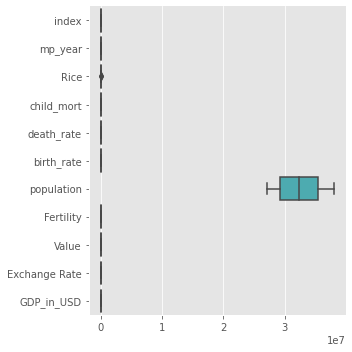

In [258]:
sns.catplot(data=df_every_Afghanistan, orient="h", kind="box");

In [259]:
df_every.columns

Index(['index', 'Country', 'mp_year', 'Rice', 'Code', 'child_mort',
       'death_rate', 'birth_rate', 'population', 'Fertility', 'Value',
       'Exchange Rate', 'GDP_in_USD', 'Continent', 'Region'],
      dtype='object')

# Data Analysis

## Linear Regression Analysis
<li> Data inspection - linear regression by continent, region and countries 
<li> Analysing outliers 
<li> Logistic regression

In [331]:
# adding column with GDP per capita
df_every['GDP_in_USD_cap'] = 1e9*df_every['GDP_in_USD'] / df_every['population']
df_every.head()

,index,Country,mp_year,Rice,Code,child_mort,death_rate,birth_rate,population,Fertility,Value,Exchange Rate,GDP_in_USD,Continent,Region,GDP_in_USD_cap,child_mort_per,child_mort_per_thousand
0,0,Afghanistan,2007,0.283790,AFG,112316.0,9.287,42.944,27100542.0,6.555,662.650,96.02,6.901166,Asia,Southern Asia,254.650495,0.041444,4.144419
1,1,Afghanistan,2008,0.420083,AFG,108874.0,8.932,41.949,27722281.0,6.373,688.247,96.02,7.167746,Asia,Southern Asia,258.555431,0.039273,3.927310
2,2,Afghanistan,2009,0.361595,AFG,105248.0,8.584,40.903,28394806.0,6.180,829.924,96.02,8.643241,Asia,Southern Asia,304.395142,0.037066,3.706593
3,3,Afghanistan,2010,0.330410,AFG,101508.0,8.250,39.829,29185511.0,5.977,899.956,96.02,9.372589,Asia,Southern Asia,321.138425,0.034780,3.478027
4,4,Afghanistan,2011,0.342172,AFG,97652.0,7.936,38.750,30117411.0,5.770,958.266,96.02,9.979858,Asia,Southern Asia,331.365082,0.032424,3.242377


In [332]:
# adding child mortality per 1,000 
df_every['child_mort_per_thousand'] = 1000*df_every['child_mort'] / df_every['population']

df_every.head()

,index,Country,mp_year,Rice,Code,child_mort,death_rate,birth_rate,population,Fertility,Value,Exchange Rate,GDP_in_USD,Continent,Region,GDP_in_USD_cap,child_mort_per,child_mort_per_thousand
0,0,Afghanistan,2007,0.283790,AFG,112316.0,9.287,42.944,27100542.0,6.555,662.650,96.02,6.901166,Asia,Southern Asia,254.650495,0.041444,4.144419
1,1,Afghanistan,2008,0.420083,AFG,108874.0,8.932,41.949,27722281.0,6.373,688.247,96.02,7.167746,Asia,Southern Asia,258.555431,0.039273,3.927310
2,2,Afghanistan,2009,0.361595,AFG,105248.0,8.584,40.903,28394806.0,6.180,829.924,96.02,8.643241,Asia,Southern Asia,304.395142,0.037066,3.706593
3,3,Afghanistan,2010,0.330410,AFG,101508.0,8.250,39.829,29185511.0,5.977,899.956,96.02,9.372589,Asia,Southern Asia,321.138425,0.034780,3.478027
4,4,Afghanistan,2011,0.342172,AFG,97652.0,7.936,38.750,30117411.0,5.770,958.266,96.02,9.979858,Asia,Southern Asia,331.365082,0.032424,3.242377


## Dataset distributions: Rice & Birth Rate

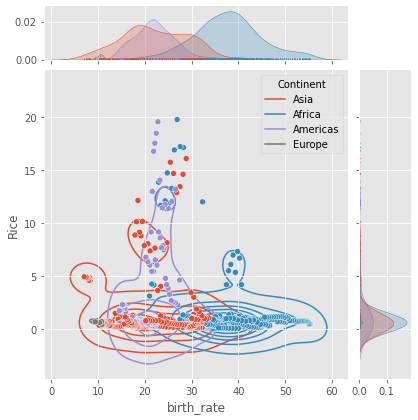

In [333]:
g = sns.jointplot(data = df_every, 
              x = 'birth_rate', 
              y = "Rice", 
              hue = 'Continent', 
              # kind = 'kde', 
              marginal_ticks= True);
g.plot_joint(sns.kdeplot, color = 'r', zorder= 0, levels = 6)
g.plot_marginals(sns.rugplot, color = 'r', 
                #  height= -.2, 
                 clip_on = False );

### Removing outliers from the Rice

In [334]:
# remove outliers from rice
df_rice = df_every[(np.abs(df_every[['Rice']]) < 1.5).all(axis = 1)]

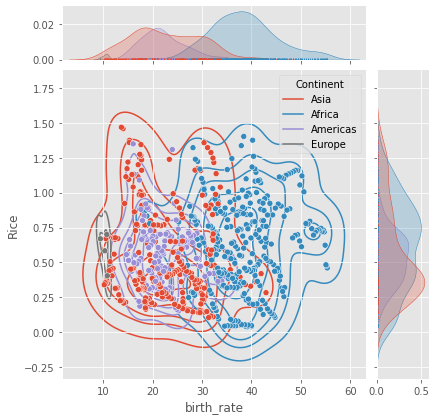

In [335]:
g = sns.jointplot(data = df_rice, 
              x = 'birth_rate', 
              y = "Rice", 
              hue = 'Continent', 
              # kind = 'kde', 
              marginal_ticks= True);
g.plot_joint(sns.kdeplot, color = 'r', zorder= 0, levels = 6)
g.plot_marginals(sns.rugplot, color = 'r', 
                #  height= -.2, 
                 clip_on = False );

## Rice & Child Mortality

In [317]:
df_rice.columns

Index(['index', 'Country', 'mp_year', 'Rice', 'Code', 'child_mort',
       'death_rate', 'birth_rate', 'population', 'Fertility', 'Value',
       'Exchange Rate', 'GDP_in_USD', 'Continent', 'Region', 'GDP_in_USD_cap',
       'child_mort_per', 'child_mort_per_thousand'],
      dtype='object')

In [336]:
# remove outliers from rice
df_rice = df_rice[(np.abs(df_rice[['child_mort_per_thousand']]) < 6).all(axis = 1)]

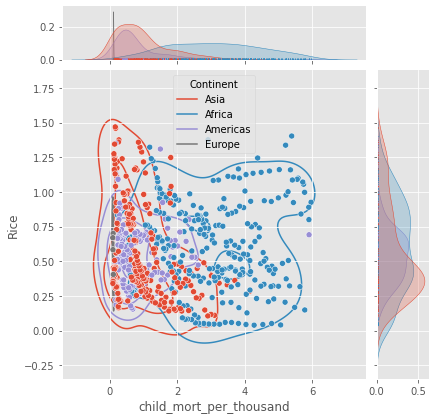

In [337]:
g = sns.jointplot(data = df_rice, 
              x = 'child_mort_per_thousand', 
              y = "Rice", 
              hue = 'Continent', 
              # kind = 'kde', 
              marginal_ticks= True);
g.plot_joint(sns.kdeplot, color = 'r', zorder= 0, levels = 6)
g.plot_marginals(sns.rugplot, color = 'r', 
                #  height= -.2, 
                 clip_on = False );

## Rice & Death rate per 1,000

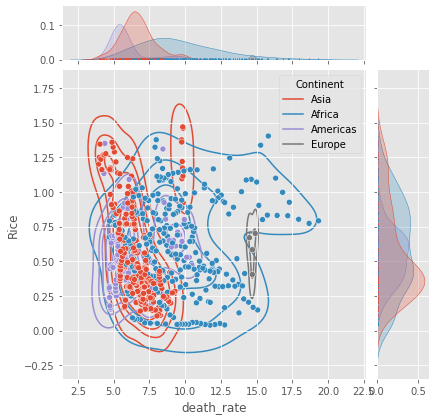

In [338]:
g = sns.jointplot(data = df_rice, 
              x = 'death_rate', 
              y = "Rice", 
              hue = 'Continent', 
              # kind = 'kde', 
              marginal_ticks= True);
g.plot_joint(sns.kdeplot, color = 'r', zorder= 0, levels = 6)
g.plot_marginals(sns.rugplot, color = 'r', 
                #  height= -.2, 
                 clip_on = False );

## Rice & GDP per capita

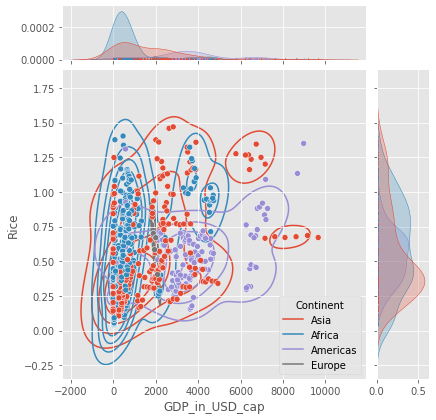

In [339]:
g = sns.jointplot(data = df_rice, 
              x = 'GDP_in_USD_cap', 
              y = "Rice", 
              hue = 'Continent', 
              # kind = 'kde', 
              marginal_ticks= True);
g.plot_joint(sns.kdeplot, color = 'r', zorder= 0, levels = 6)
g.plot_marginals(sns.rugplot, color = 'r', 
                #  height= -.2, 
                 clip_on = False );

In [349]:
m = sm.ols('Rice ~ GDP_in_USD_cap +death_rate + child_mort_per_thousand+ birth_rate ', data = df_rice) 
m = m.fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rice   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     27.46
Date:                Thu, 09 Dec 2021   Prob (F-statistic):           5.04e-21
Time:                        02:53:11   Log-Likelihood:                -105.71
No. Observations:                 631   AIC:                             221.4
Df Residuals:                     626   BIC:                             243.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -0.1953      0.097     -2.007      0.045      -0.386      -0.004
GDP_in_USD_cap           7.105e-05    7.6e-06      9.354      0.000    5.61e-05     8.6e-05
death_rate                  0.0395      0.008      5.007      0.000       0.024       0.055
child_mort_per_thousand    -0.1100      0.024     -4.511      0.000      -0.158      -0.062
birth_rate                  0.0191      0.003      6.189      0.000       0.013       0.025
==============================================================================
Omnibus:                       25.296   Durbin-Watson:                   0.447
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.717
Skew:                           0.511   Prob(JB):                     9.58e-07
Kurtosis:                       2.894   Cond. No.                     2.25e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [341]:
m = sm.ols('birth_rate ~ GDP_in_USD_cap +death_rate + child_mort_per_thousand+ Rice + Continent', data = df_rice) 
m = m.fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             birth_rate   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     733.7
Date:                Thu, 09 Dec 2021   Prob (F-statistic):          5.40e-296
Time:                        02:49:33   Log-Likelihood:                -1597.1
No. Observations:                 631   AIC:                             3210.
Df Residuals:                     623   BIC:                             3246.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  33.2777      0.663     50.223      0.000      31.977      34.579
Continent[T.Americas]      -5.0087      0.448    -11.171      0.000      -5.889      -4.128
Continent[T.Asia]          -5.6488      0.368    -15.351      0.000      -6.371      -4.926
Continent[T.Europe]        -0.7454      1.740     -0.428      0.669      -4.163       2.672
GDP_in_USD_cap             -0.0007   9.12e-05     -7.900      0.000      -0.001      -0.001
death_rate                 -1.5393      0.081    -19.072      0.000      -1.698      -1.381
child_mort_per_thousand     5.6587      0.168     33.774      0.000       5.330       5.988
Rice                        2.1702      0.423      5.125      0.000       1.339       3.002
==============================================================================
Omnibus:                       51.476   Durbin-Watson:                   0.383
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              198.620
Skew:                          -0.253   Prob(JB):                     7.42e-44
Kurtosis:                       5.702   Cond. No.                     3.71e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.71e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Birth Rate Analysis (with outliers)

In [348]:
m = sm.ols('birth_rate ~ GDP_in_USD_cap +death_rate + child_mort_per_thousand+ Rice + Continent', data = df_every) # Model with just Rice and GDP 
m = m.fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             birth_rate   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     693.6
Date:                Thu, 09 Dec 2021   Prob (F-statistic):               0.00
Time:                        02:52:43   Log-Likelihood:                -2118.9
No. Observations:                 772   AIC:                             4254.
Df Residuals:                     764   BIC:                             4291.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  35.3088      0.660     53.516      0.000      34.014      36.604
Continent[T.Americas]      -8.2234      0.454    -18.131      0.000      -9.114      -7.333
Continent[T.Asia]          -8.1145      0.387    -20.981      0.000      -8.874      -7.355
Continent[T.Europe]        -8.5270      2.065     -4.129      0.000     -12.581      -4.473
GDP_in_USD_cap             -0.0003   3.44e-05     -8.890      0.000      -0.000      -0.000
death_rate                 -1.0971      0.090    -12.190      0.000      -1.274      -0.920
child_mort_per_thousand     3.8180      0.130     29.287      0.000       3.562       4.074
Rice                       -0.1981      0.045     -4.376      0.000      -0.287      -0.109
==============================================================================
Omnibus:                       55.515   Durbin-Watson:                   0.257
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.333
Skew:                          -0.440   Prob(JB):                     5.48e-26
Kurtosis:                       4.686   Cond. No.                     7.42e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [269]:
df_every.dropna(inplace = True)
description(df_every)

Datframe Shape: 
 (772, 16)
Null Values: 
 index             0
Country           0
mp_year           0
Rice              0
Code              0
child_mort        0
death_rate        0
birth_rate        0
population        0
Fertility         0
Value             0
Exchange Rate     0
GDP_in_USD        0
Continent         0
Region            0
GDP_in_USD_cap    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 772 entries, 0 to 1041
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           772 non-null    int64  
 1   Country         772 non-null    object 
 2   mp_year         772 non-null    int64  
 3   Rice            772 non-null    float64
 4   Code            772 non-null    object 
 5   child_mort      772 non-null    float64
 6   death_rate      772 non-null    float64
 7   birth_rate      772 non-null    float64
 8   population      772 non-null    float64
 9   Fertility       77

In [270]:
# Y = df_every['birth_rate']
# X = df_every[['child_mort',
#                'Rice', 
#               'GDP_in_USD', 
#               'death_rate', 
#               'Fertility',
#               # 'Continent'
#               ]]
# X = stats.add_constant(X)              
# results = stats.OLS(Y , X).fit()
# print(results.summary())

### child mortality analysis

In [271]:
m = sm.ols('child_mort ~ GDP_in_USD + death_rate + birth_rate + Rice + Continent ', data = df_every) # Model with just Rice and GDP 
m = m.fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             child_mort   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     21.31
Date:                Thu, 09 Dec 2021   Prob (F-statistic):           2.52e-26
Time:                        02:18:09   Log-Likelihood:                -10187.
No. Observations:                 772   AIC:                         2.039e+04
Df Residuals:                     764   BIC:                         2.043e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -1.958e+05   3.07e+04     -6.386      0.000   -2.56e+05   -1.36e+05
Continent[T.Americas]  3.384e+04   1.75e+04      1.937      0.053    -448.449    6.81e+04
Continent[T.Asia]       8.24e+04   1.57e+04      5.247      0.000    5.16e+04    1.13e+05
Continent[T.Europe]    7565.5993    7.1e+04      0.107      0.915   -1.32e+05    1.47e+05
GDP_in_USD               10.9276      4.319      2.530      0.012       2.448      19.407
death_rate             9368.6059   2016.469      4.646      0.000    5410.128    1.33e+04
birth_rate             4812.8530    803.995      5.986      0.000    3234.551    6391.155
Rice                   7318.5372   1574.478      4.648      0.000    4227.720    1.04e+04
==============================================================================
Omnibus:                      659.667   Durbin-Watson:                   0.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12562.181
Skew:                           3.956   Prob(JB):                         0.00
Kurtosis:                      21.109   Cond. No.                     1.81e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### mortality rate analysis

In [272]:
m = sm.ols('death_rate ~ GDP_in_USD + birth_rate + Rice +child_mort + Continent', data = df_every) # Model with just Rice and GDP 
m = m.fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             death_rate   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     121.6
Date:                Thu, 09 Dec 2021   Prob (F-statistic):          1.20e-119
Time:                        02:18:09   Log-Likelihood:                -1739.8
No. Observations:                 772   AIC:                             3496.
Df Residuals:                     764   BIC:                             3533.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 5.1025      0.525      9.713      0.000       4.071       6.134
Continent[T.Americas]    -2.4887      0.296     -8.397      0.000      -3.071      -1.907
Continent[T.Asia]        -1.8045      0.275     -6.557      0.000      -2.345      -1.264
Continent[T.Europe]       8.1572      1.221      6.681      0.000       5.760      10.554
GDP_in_USD                0.0004   7.56e-05      4.746      0.000       0.000       0.001
birth_rate                0.1377      0.014     10.067      0.000       0.111       0.165
Rice                     -0.0382      0.028     -1.353      0.177      -0.094       0.017
child_mort             2.933e-06   6.31e-07      4.646      0.000    1.69e-06    4.17e-06
==============================================================================
Omnibus:                      168.052   Durbin-Watson:                   0.236
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              356.695
Skew:                           1.200   Prob(JB):                     3.51e-78
Kurtosis:                       5.309   Cond. No.                     2.36e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.36e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

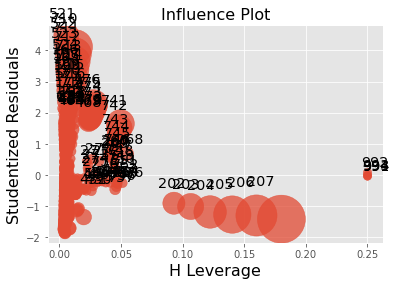

In [273]:
fig = influence_plot(m, criterion = 'cooks')

## Removing Outliers from the dataframe

In [274]:
stud_res = m.outlier_test()
stud_res
newdf = stud_res[(stud_res.student_resid > 3) | (stud_res.student_resid < -3)]

In [275]:
newdf.index

Int64Index([166, 167, 168, 169, 521, 522, 523, 524, 525, 710, 711, 712, 713,
            714],
           dtype='int64')

In [276]:
df_every.shape

(772, 16)

In [277]:
df_every_n = df_every.drop(df_every.index[[166, 167, 168, 169, 521, 522, 523, 524, 525, 710, 711, 712, 713,
            714]])

In [278]:
df_every_n.shape

(758, 16)

In [279]:
m = sm.ols('birth_rate ~ GDP_in_USD_cap +death_rate + child_mort+ Rice + Continent', data = df_every_n) # Model with just Rice and GDP 
m = m.fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             birth_rate   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     274.6
Date:                Thu, 09 Dec 2021   Prob (F-statistic):          4.45e-202
Time:                        02:18:11   Log-Likelihood:                -2355.0
No. Observations:                 758   AIC:                             4726.
Df Residuals:                     750   BIC:                             4763.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                28.2170      0.879     32.099      0.000      26.491      29.943
Continent[T.Americas]    -8.7273      0.658    -13.269      0.000     -10.019      -7.436
Continent[T.Asia]       -10.2371      0.553    -18.518      0.000     -11.322      -9.152
Continent[T.Europe]     -30.1314      2.762    -10.911      0.000     -35.553     -24.710
GDP_in_USD_cap        -6.322e+05   4.66e+04    -13.574      0.000   -7.24e+05   -5.41e+05
death_rate                0.9245      0.080     11.533      0.000       0.767       1.082
child_mort             6.569e-06   1.48e-06      4.443      0.000    3.67e-06    9.47e-06
Rice                     -0.2473      0.066     -3.743      0.000      -0.377      -0.118
==============================================================================
Omnibus:                        1.177   Durbin-Watson:                   0.216
Prob(Omnibus):                  0.555   Jarque-Bera (JB):                1.046
Skew:                           0.013   Prob(JB):                        0.593
Kurtosis:                       3.180   Cond. No.                     3.77e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.77e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

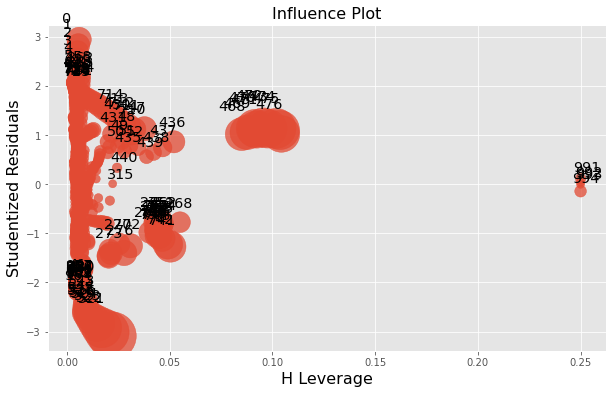

In [280]:
fig, ax = plt.subplots(figsize= (10,6))
fig = influence_plot(m, criterion = 'cooks', ax = ax)

In [281]:
m = sm.ols('birth_rate ~ GDP_in_USD + Rice', data = df_every_Afghanistan) # Model with just Rice and GDP 
m = m.fit()
m.summary()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             birth_rate   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     107.7
Date:                Thu, 09 Dec 2021   Prob (F-statistic):           1.72e-07
Time:                        02:18:13   Log-Likelihood:                -14.673
No. Observations:                  13   AIC:                             35.35
Df Residuals:                      10   BIC:                             37.04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     54.6536      1.590     34.378      0.000      51.111      58.196
GDP_in_USD    -1.4584      0.168     -8.702      0.000      -1.832      -1.085
Rice          -3.9622      6.089     -0.651      0.530     -17.530       9.605
==============================================================================
Omnibus:                        1.402   Durbin-Watson:                   0.523
Prob(Omnibus):                  0.496   Jarque-Bera (JB):                1.097
Skew:                           0.613   Prob(JB):                        0.578
Kurtosis:                       2.276   Cond. No.                         295.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Visual Inspection

### Rice contribution to the birth rate

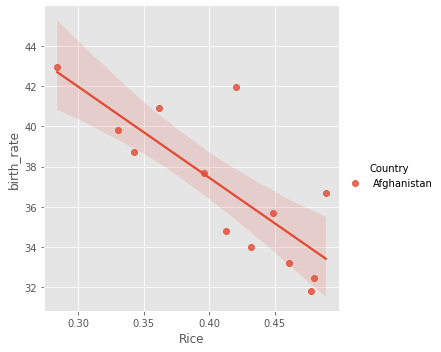

In [282]:
sns.lmplot(x = 'Rice',  y = 'birth_rate', hue = "Country", 
           data = df_every_Afghanistan
           );
    

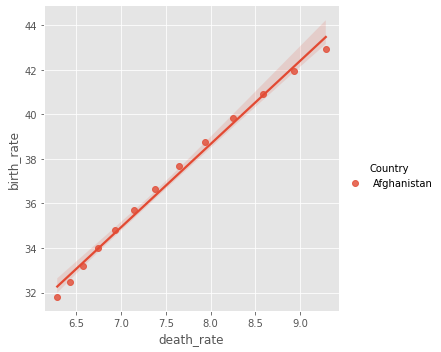

In [283]:
sns.lmplot(x = 'death_rate',  y = 'birth_rate', hue = "Country", 
           data = df_every_Afghanistan,
           );

### Rice contribution to regions

In [284]:
df_every.head()

,index,Country,mp_year,Rice,Code,child_mort,death_rate,birth_rate,population,Fertility,Value,Exchange Rate,GDP_in_USD,Continent,Region,GDP_in_USD_cap
0,0,Afghanistan,2007,0.283790,AFG,112316.0,9.287,42.944,27100542.0,6.555,662.650,96.02,6.901166,Asia,Southern Asia,2.546505e-07
1,1,Afghanistan,2008,0.420083,AFG,108874.0,8.932,41.949,27722281.0,6.373,688.247,96.02,7.167746,Asia,Southern Asia,2.585554e-07
2,2,Afghanistan,2009,0.361595,AFG,105248.0,8.584,40.903,28394806.0,6.180,829.924,96.02,8.643241,Asia,Southern Asia,3.043951e-07
3,3,Afghanistan,2010,0.330410,AFG,101508.0,8.250,39.829,29185511.0,5.977,899.956,96.02,9.372589,Asia,Southern Asia,3.211384e-07
4,4,Afghanistan,2011,0.342172,AFG,97652.0,7.936,38.750,30117411.0,5.770,958.266,96.02,9.979858,Asia,Southern Asia,3.313651e-07


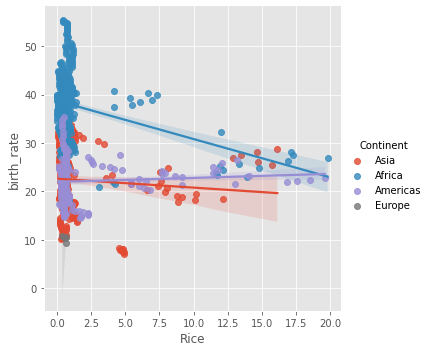

In [285]:
sns.lmplot(x = 'Rice',  y = 'birth_rate', hue = "Continent", 
           data = df_every,
           );

<li> We have observed negative correlation between rice price and birth rate in Africa and 

In [286]:
# df_rice = df_every[(np.abs(stats.zscore(df_every[['Rice']])) < 1).all(axis = 1)]
df_rice = df_every[(np.abs(df_every[['Rice']]) < 2).all(axis = 1)]

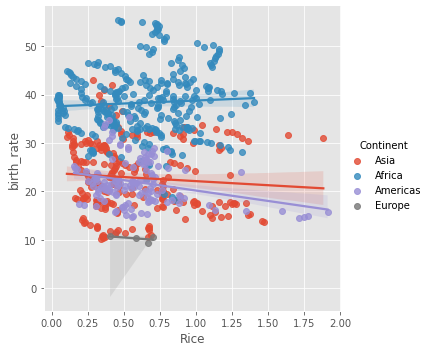

In [287]:
sns.lmplot(x = 'Rice',  y = 'birth_rate', hue = "Continent", 
           data = df_rice,
           );

In [288]:
# plt.figure()
# df_every.plot(subplots=True, figsize=(20,20))
# plt.xlabel("Date");

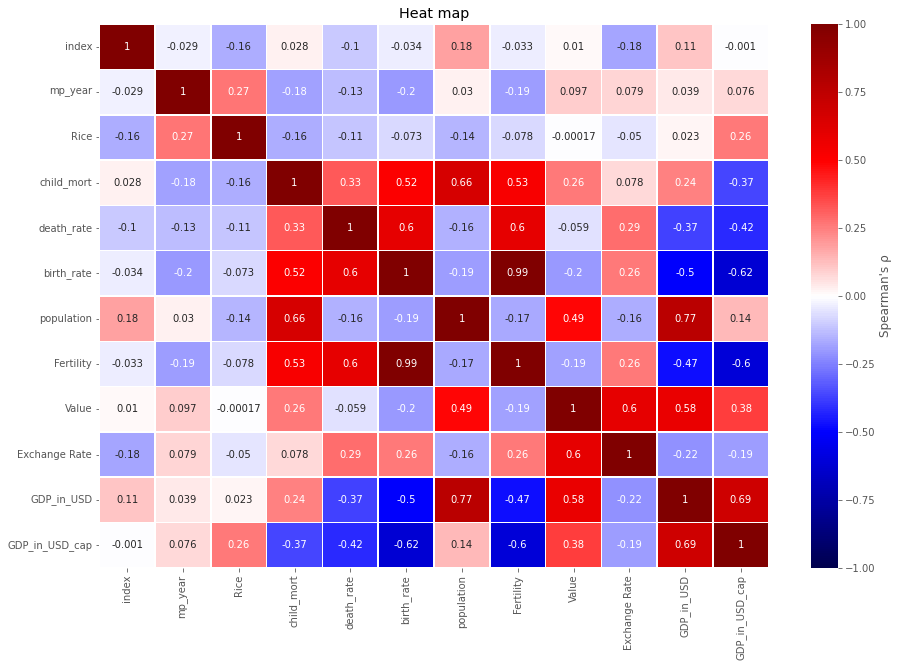

In [289]:
df_cm = df_all.corr(method = 'spearman')

plt.figure(figsize=(15,10))
ax = sns.heatmap(df_cm, cmap="seismic", annot=True, linewidths=.5, cbar_kws={"label": "Spearman's ρ"}, vmin=-1, vmax=1);
ax.set_title("Heat map");

##Another Case Study(Categorical Testing), Include in appendix

We have categorized counrtries, region, and continent

In [290]:
df_other = df5[['Country','mp_year','cm_name','usprice', ]]
df_all2 = pd.merge(
    df_other,
    df_childMort,
    left_on=('Country', 'mp_year'),
    right_on=('Entity', "Year"),
        
    how='left',
    # on = 'Country',
)
df_all2 = df_all2.drop(['Year'], axis = 1)
df_all2.head()

,Country,mp_year,cm_name,usprice,Code,Number of under-five deaths
0,Afghanistan,2014,Bread,0.520725,AFG,86414.0
1,Afghanistan,2014,Bread,0.520725,AFG,86414.0
2,Afghanistan,2014,Bread,0.520725,AFG,86414.0
3,Afghanistan,2014,Bread,0.520725,AFG,86414.0
4,Afghanistan,2014,Bread,0.520725,AFG,86414.0


In [291]:
df_all2 = pd.merge(
    df_all2,
    df_BirthDeathRate,
    left_on=('Code', 'mp_year'),
    right_on=('Code', "Year"),
        
    how='left',
    # on = 'Country',
    # validate = 'one_to_one'
)
df_all2 = df_all2.drop(['Year'], axis = 1)
df_all2.head()

,Country,mp_year,cm_name,usprice,Code,Number of under-five deaths,"Death rate, crude (per 1,000 people)","Birth rate, crude (per 1,000 people)",Population (historical estimates)
0,Afghanistan,2014,Bread,0.520725,AFG,86414.0,7.141,35.706,33370803.0
1,Afghanistan,2014,Bread,0.520725,AFG,86414.0,7.141,35.706,33370803.0
2,Afghanistan,2014,Bread,0.520725,AFG,86414.0,7.141,35.706,33370803.0
3,Afghanistan,2014,Bread,0.520725,AFG,86414.0,7.141,35.706,33370803.0
4,Afghanistan,2014,Bread,0.520725,AFG,86414.0,7.141,35.706,33370803.0


In [292]:
df_test2= pd.merge(
    df_all2,
    df_gdp,
    left_on=('Country','mp_year' ),
    right_on=('Country', 'Year'),
    
    how='left',
    # on = 'Country',
    # validate = 'many_to_one'
)
df_all2 = df_test2.drop(['Units', 'Year'] , axis = 1)
df_all2 = df_all2.rename(columns = { 'Number of under-five deaths': 'child_mort',
                                      'Death rate, crude (per 1,000 people)': 'death_rate',
                                      'Birth rate, crude (per 1,000 people)': 'birth_rate',
                                       'Population (historical estimates)': 'population'})

df_all2 = pd.merge(
    df_all2,
    df_region,
    # left_on=('Country'),
    # right_on=('Country'),
    
    how='left',
    on = 'Country',
    validate = 'many_to_one'
)


In [293]:
s = (df_all2.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['Country', 'cm_name', 'Code', 'Continent', 'Region']


In [294]:
df_all2.drop(columns = ['Code'])
df_all2.head()

,Country,mp_year,cm_name,usprice,Code,child_mort,death_rate,birth_rate,population,Value,Exchange Rate,GDP_in_USD,Continent,Region
0,Afghanistan,2014,Bread,0.520725,AFG,86414.0,7.141,35.706,33370803.0,1185.31,96.02,12.344407,Asia,Southern Asia
1,Afghanistan,2014,Bread,0.520725,AFG,86414.0,7.141,35.706,33370803.0,1185.31,96.02,12.344407,Asia,Southern Asia
2,Afghanistan,2014,Bread,0.520725,AFG,86414.0,7.141,35.706,33370803.0,1185.31,96.02,12.344407,Asia,Southern Asia
3,Afghanistan,2014,Bread,0.520725,AFG,86414.0,7.141,35.706,33370803.0,1185.31,96.02,12.344407,Asia,Southern Asia
4,Afghanistan,2014,Bread,0.520725,AFG,86414.0,7.141,35.706,33370803.0,1185.31,96.02,12.344407,Asia,Southern Asia


In [295]:
# 
label_data = df_all2.copy()
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])

In [296]:
description(label_data)

Datframe Shape: 
 (1664502, 14)
Null Values: 
 Country               0
mp_year               0
cm_name               0
usprice               0
Code                  0
child_mort       690203
death_rate       690203
birth_rate       690203
population       690203
Value            354361
Exchange Rate    354361
GDP_in_USD       354361
Continent             0
Region                0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1664502 entries, 0 to 1664501
Data columns (total 14 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Country        1664502 non-null  int64  
 1   mp_year        1664502 non-null  int64  
 2   cm_name        1664502 non-null  int64  
 3   usprice        1664502 non-null  float64
 4   Code           1664502 non-null  int64  
 5   child_mort     974299 non-null   float64
 6   death_rate     974299 non-null   float64
 7   birth_rate     974299 non-null   float64
 8   population     974299 non-

## 

In [297]:
label_data.head()

,Country,mp_year,cm_name,usprice,Code,child_mort,death_rate,birth_rate,population,Value,Exchange Rate,GDP_in_USD,Continent,Region
0,0,2014,15,0.520725,0,86414.0,7.141,35.706,33370803.0,1185.31,96.02,12.344407,2,11
1,0,2014,15,0.520725,0,86414.0,7.141,35.706,33370803.0,1185.31,96.02,12.344407,2,11
2,0,2014,15,0.520725,0,86414.0,7.141,35.706,33370803.0,1185.31,96.02,12.344407,2,11
3,0,2014,15,0.520725,0,86414.0,7.141,35.706,33370803.0,1185.31,96.02,12.344407,2,11
4,0,2014,15,0.520725,0,86414.0,7.141,35.706,33370803.0,1185.31,96.02,12.344407,2,11


In [298]:
# predictors = [ 'cm_name']
# m = Logit(label_data['birth_rate'], label_data[predictors])
# m = m.fit()
# m.params
# m.summary2()

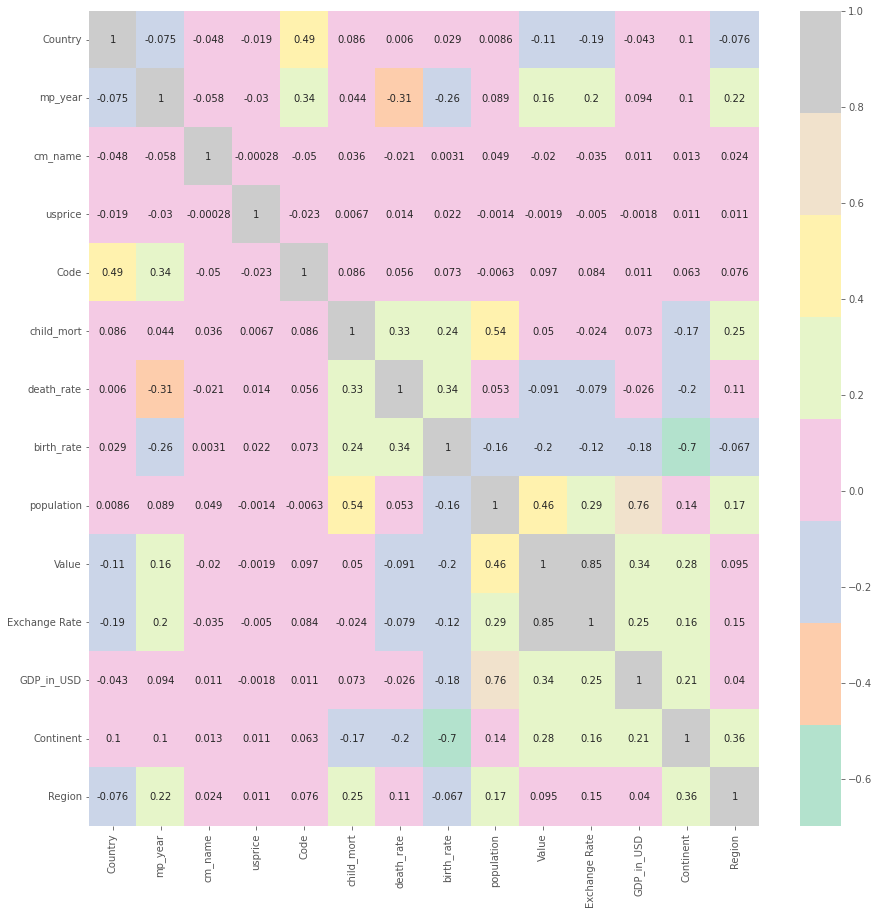

In [299]:
corrmat= label_data.corr()
f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corrmat,cmap="Pastel2",annot=True)

By splitting to categorical view there is no relationship between commodity, & price with any value/ table shown above

Using Data set Label_data (Category changed to numerics )

# Ramila Bootstrapping  Model 

In [300]:
df_all2.columns # Original Data Set

Index(['Country', 'mp_year', 'cm_name', 'usprice', 'Code', 'child_mort',
       'death_rate', 'birth_rate', 'population', 'Value', 'Exchange Rate',
       'GDP_in_USD', 'Continent', 'Region'],
      dtype='object')

In [301]:
 # Original Data Set take only Zimbabwe and look at Beans Comparable
df_Zimbabwe = df_all2[(df_all2.Country == 'Zimbabwe')& (df_all2.cm_name == 'Beans')]
df_Zimbabwe= df_Zimbabwe.dropna() # Removing all the Nulls 


In [302]:
df_Zimbabwe # data set for Zimbabwe has 509 Rows So good data set

,Country,mp_year,cm_name,usprice,Code,child_mort,death_rate,birth_rate,population,Value,Exchange Rate,GDP_in_USD,Continent,Region
1653545,Zimbabwe,2014,Beans,0.003868,ZWE,30289.0,9.277,34.978,13586710.0,17.870,361.9,0.049378,Africa,Eastern Africa
1653546,Zimbabwe,2014,Beans,0.003868,ZWE,30289.0,9.277,34.978,13586710.0,17.870,361.9,0.049378,Africa,Eastern Africa
1653547,Zimbabwe,2014,Beans,0.003868,ZWE,30289.0,9.277,34.978,13586710.0,17.870,361.9,0.049378,Africa,Eastern Africa
1653548,Zimbabwe,2014,Beans,0.003868,ZWE,30289.0,9.277,34.978,13586710.0,17.870,361.9,0.049378,Africa,Eastern Africa
1653549,Zimbabwe,2015,Beans,0.003868,ZWE,29045.0,8.673,33.981,13814642.0,18.190,361.9,0.050263,Africa,Eastern Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663396,Zimbabwe,2018,Beans,0.007184,ZWE,25105.0,7.883,30.676,14438812.0,20.115,361.9,0.055582,Africa,Eastern Africa
1663409,Zimbabwe,2018,Beans,0.005526,ZWE,25105.0,7.883,30.676,14438812.0,20.115,361.9,0.055582,Africa,Eastern Africa
1663414,Zimbabwe,2017,Beans,0.006632,ZWE,26611.0,8.044,31.732,14236599.0,19.187,361.9,0.053017,Africa,Eastern Africa
1663415,Zimbabwe,2018,Beans,0.007737,ZWE,25105.0,7.883,30.676,14438812.0,20.115,361.9,0.055582,Africa,Eastern Africa


In [303]:
# Running the Boot Strap to the Data Set using two variable Beans Price and GDP
import numpy as np
from mlxtend.evaluate import bootstrap

TRIAL = df_Zimbabwe[["usprice","GDP_in_USD",]] # We can add all the variables we want to analyse in this section 
TRIAL
x = TRIAL.values
original, std_err, ci_bounds = bootstrap(x, num_rounds=1000, func=np.mean, ci=0.95, seed=123)
print('Mean: %.2f, SE: +/- %.2f, CI95: [%.2f, %.2f]' % (original, 
                                                             std_err, 
                                                             ci_bounds[0],
                                                             ci_bounds[1]))

Mean: 0.03, SE: +/- 0.00, CI95: [0.03, 0.03]
